# Value-based prediction

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

from lqsvg.experiment import plot
from lqsvg.experiment.utils import wandb_runs_dataframe

sns.set()

In [3]:
DATA = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={},
    tags=["ValueLearning", "9.30.0"],
)
DATA.head()

,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/action_grad_acc,_runtime,epoch,val/bootstrap/action_grad_acc,val/relative_vval_err,_timestamp,...,summary/test/grad_acc,summary/controllability,summary/trainable_parameters,summary/stability,summary/train/grad_acc,summary/trainer/global_step,summary/test/action_grad_acc,summary/val/bootstrap/relative_qval_err,summary/train/bootstrap/relative_qval_err,summary/val/action_grad_acc
0,0,0.482922,6.206344,0,0.607343,5,0,0.577971,35.23204,1633021724,...,0.653986,True,2100,False,0.555313,28160,0.826376,0.903581,0.751732,0.828548
1,49,NaN,NaN,1,NaN,7,0,NaN,NaN,1633021726,...,0.653986,True,2100,False,0.555313,28160,0.826376,0.903581,0.751732,0.828548
2,99,NaN,NaN,2,NaN,9,0,NaN,NaN,1633021728,...,0.653986,True,2100,False,0.555313,28160,0.826376,0.903581,0.751732,0.828548
3,149,NaN,NaN,3,NaN,12,0,NaN,NaN,1633021731,...,0.653986,True,2100,False,0.555313,28160,0.826376,0.903581,0.751732,0.828548
4,199,NaN,NaN,4,NaN,14,0,NaN,NaN,1633021733,...,0.653986,True,2100,False,0.555313,28160,0.826376,0.903581,0.751732,0.828548


In [4]:
DATA.columns

Index(['trainer/global_step', 'val/grad_acc',
       'val/bootstrap/relative_qval_err', '_step', 'val/action_grad_acc',
       '_runtime', 'epoch', 'val/bootstrap/action_grad_acc',
       'val/relative_vval_err', '_timestamp', 'train/action_grad_acc',
       'train/bootstrap/relative_qval_err', 'train/loss',
       'train/relative_vval_err', 'train/grad_acc',
       'train/bootstrap/action_grad_acc', 'test/grad_acc',
       'test/bootstrap/action_grad_acc', 'test/action_grad_acc',
       'test/bootstrap/relative_qval_err', 'test/relative_vval_err',
       'config/loss', 'config/seed', 'config/polyak', 'config/weight_decay',
       'config/learning_rate', 'config/model/type', 'config/model/hunits',
       'config/trainer/max_epochs', 'config/trainer/weights_summary',
       'config/trainer/val_check_interval',
       'config/trainer/progress_bar_refresh_rate',
       'config/datamodule/trajectories', 'config/datamodule/val_batch_size',
       'config/datamodule/train_batch_size', 'confi

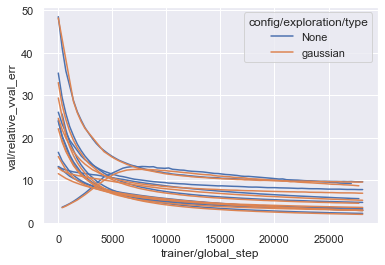

In [7]:
sns.lineplot(
    data=DATA[DATA["config/polyak"] != 0],
    x="trainer/global_step",
    y="val/relative_vval_err",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
plt.show()

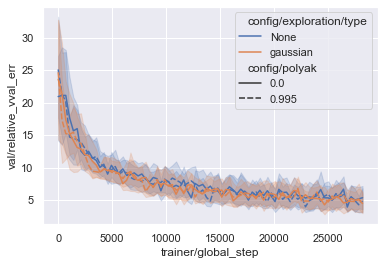

In [9]:
sns.lineplot(
    data=DATA,
    x="trainer/global_step",
    y="val/relative_vval_err",
    hue="config/exploration/type",
    style="config/polyak",
)
plt.show()

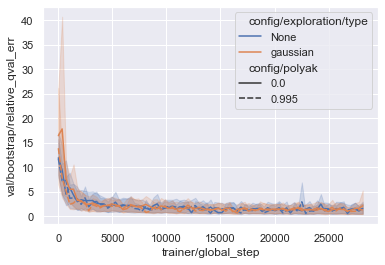

In [11]:
sns.lineplot(
    data=DATA,
    x="trainer/global_step",
    y="val/bootstrap/relative_qval_err",
    hue="config/exploration/type",
    style="config/polyak",

)
plt.show()

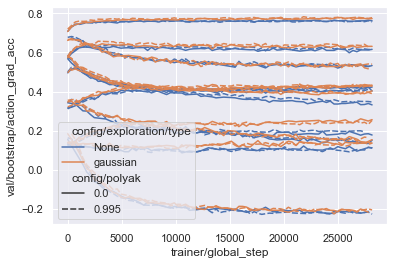

In [16]:
sns.lineplot(
    data=DATA,
    x="trainer/global_step",
    y="val/bootstrap/action_grad_acc",
    hue="config/exploration/type",
    style="config/polyak",
    units="config/seed",
    estimator=None
)
plt.show()

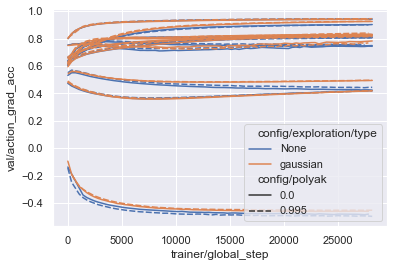

In [17]:
sns.lineplot(
    data=DATA,
    x="trainer/global_step",
    y="val/action_grad_acc",
    hue="config/exploration/type",
    style="config/polyak",
    units="config/seed",
    estimator=None
)
plt.show()

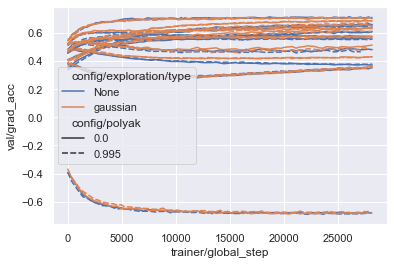

In [15]:
sns.lineplot(
    data=DATA,
    x="trainer/global_step",
    y="val/grad_acc",
    hue="config/exploration/type",
    style="config/polyak",
    units="config/seed",
    estimator=None
)
plt.show()